<a href="https://colab.research.google.com/github/peguescj/data-management/blob/main/PS1Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

PS1 Submission
Data Sources and explainations within this linked doc
https://docs.google.com/document/d/1hQcGhfWeyMVtDPGIB0Ltd1_KWXSvP9CFSgXpOytOfjk/edit?usp=sharing

In [11]:
#Uploading the NJ Per Pupil Expenditure Data as a CSV.
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1HCCdqd0pEMFDnBSAjlQ-AULTGKQpbM1P&export=download", "PerPupil.csv")
!wget -q -O PerPupil.csv https://docs.google.com/uc?id=1HCCdqd0pEMFDnBSAjlQ-AULTGKQpbM1P&export=download

In [3]:
# basic navigation
#wd =  'PerPupil'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
PerPupil.csv  sample_data


In [4]:
dat=pd.read_csv('PerPupil.csv') #read it in  ; or full path: '/content/final_data.csv'

In [5]:
dat.columns #list var names

Index(['county_id', 'coname', 'district_id', 'distname', 'line_desc', 'year1',
       'year2', 'year3', 'year4', 'year5'],
      dtype='object')

In [6]:
dat["year1"][0:50] #How much the school spent money in 2016

0     $11,318 
1      $7,550 
2      $7,202 
3        $264 
4         $84 
5      $1,277 
6      $1,103 
7      $1,262 
8      $1,062 
9      $1,164 
10       $635 
11         $0 
12        $55 
13         $0 
14        $20 
15      30.63%
16    $19,422 
17    $12,021 
18    $11,376 
19       $424 
20       $220 
21     $2,864 
22     $2,605 
23     $1,602 
24     $1,290 
25     $2,644 
26     $1,477 
27         $0 
28       $235 
29        $32 
30       $111 
31      33.45%
32    $11,998 
33     $6,343 
34     $5,909 
35       $382 
36        $52 
37     $1,397 
38     $1,299 
39     $1,197 
40       $863 
41     $2,533 
42     $1,292 
43         $0 
44       $292 
45       $161 
46        $22 
47      33.44%
48    $49,255 
49    $28,329 
Name: year1, dtype: object

In [7]:
#Looking to see if the total cost is static over years
#Seems like previous years spending is a good indicator of next years - Is there a built in way to regress in python?
dat[["year1","year2", "year3"]][0:50]

,year1,year2,year3
0,"$11,318","$11,148","$11,731"
1,"$7,550","$7,465","$7,937"
2,"$7,202","$7,218","$7,693"
3,$264,$192,$158
4,$84,$56,$86
5,"$1,277","$1,235","$1,201"
6,"$1,103","$1,045","$1,004"
7,"$1,262","$1,276","$1,345"
8,"$1,062","$1,083","$1,093"
9,"$1,164","$1,117","$1,184"


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='year2', ylabel='year1'>

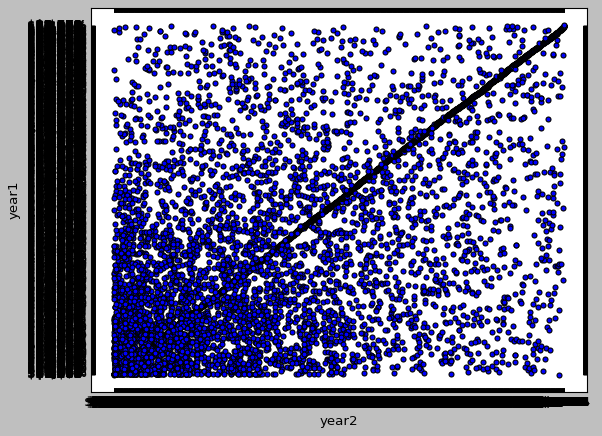

In [8]:
#Scatter plot to visualize the above a bit better
dat.plot(kind='scatter', y='year1', x='year2')

Realized after I ran it that a scatterplot is not useful for this dataset unless you've manipulated the data onto more interesting variables. Whoops!

In [9]:
#Uploading the NJ Median Income and Populations by County - ideally to compare with Per Pupil spending when we merge
#UGLY - Includes NJ and USA as a whole ALPHABETICALLY in the chart, not at the bottom or top.
#Is there a way to cull specific entires? I assume there's a simple drop command by variable number. In this case we could
#clear it by dropping all variables with no "Rank" as USA and NJ totals were skipped.
pd.read_html('https://en.wikipedia.org/wiki/List_of_New_Jersey_locations_by_per_capita_income',match='Population',flavor=None)[0].head(22)

,Rank,County,Per capita income,Median household income,Median family income,Population,Number of households
0,1.0,Hunterdon,"$48,489","$100,980","$121,166",128349,47169
1,2.0,Morris,"$47,342","$96,747","$114,694",492276,180534
2,3.0,Somerset,"$47,067","$97,440","$115,214",323444,117759
3,4.0,Bergen,"$42,006","$81,708","$100,310",905116,335730
4,5.0,Monmouth,"$40,976","$82,265","$102,074",630380,233983
5,6.0,Mercer,"$36,016","$71,217","$88,694",366513,133155
6,7.0,Sussex,"$35,982","$83,089","$93,701",149265,54752
7,NaN,New Jersey,"$34,858","$69,811","$84,904",8791894,3214360
8,8.0,Burlington,"$34,802","$76,258","$91,185",448734,166318
9,9.0,Union,"$34,096","$66,791","$80,818",536499,188118


In [10]:
#Uploading the Nj Graduation Rate by category as an xlsv - in future I have versions of these that are split in a more useful manner
#Base document is near unusable in how it coded the attributes - has all of the different categories listed next to one another
#so they're all interpreted under the same variable as one another
#urllib.request.urlretrieve("https://docs.google.com/uc?id=1g168RZqCUj3aujXJP2CEssnLHBmYbDQw&export=download ", "GradRate.xlsv")
!wget -q -O GradRate.xlsv https://docs.google.com/uc?id=1g168RZqCUj3aujXJP2CEssnLHBmYbDQw&export=download

In [ ]:
# basic navigation
#wd =  'PerPupil'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
final_data.csv	GradRate.csv  GradRate.xlsv  PerPupil.csv  sample_data


In [ ]:
dat=pd.read_excel('GradRate.xlsv') #read it in  ; or full path: '/content/GradRate.xlsv'

In [ ]:
dat.columns #list var names

Index(['County Code', 'County Name', 'District Code', 'District Name',
       'School Code', 'School Name', 'Student Group', 'Graduation Rate',
       'Cohort Count', 'Graduated'],
      dtype='object')

In [ ]:
dat["Graduation Rate"][0:50] #Pulling up all of the grad rates - base is not useful as it has "All" "Female" "Male" in same line
#Have version from last year that I've applied changes too - curious if python can help do those for me so just using base

0         N
1      93.4
2      69.6
3      75.9
4      66.2
5      81.7
6      70.8
7      64.3
8      72.0
9         N
10        *
11        N
12        *
13     71.6
14     76.6
15        *
16     89.8
17        N
18     93.4
19     69.6
20     75.9
21     66.2
22     81.7
23     70.8
24     64.3
25     72.0
26        N
27        *
28        N
29        *
30     71.6
31     76.6
32        *
33     89.8
34        *
35    100.0
36     96.9
37     96.5
38        N
39     98.1
40     96.2
41        *
42     96.1
43        N
44     92.9
45        N
46        N
47     94.7
48     97.2
49    100.0
Name: Graduation Rate, dtype: object

In [ ]:
#let's show off the problem I mentioned
#all different groups on the same line for grad rate - Have to splice them into seperate lines to compare!
#Did manually before - must be way to automate it.
dat[["Graduation Rate","Cohort Count", "Student Group"]][0:50]

,Graduation Rate,Cohort Count,Student Group
0,N,N,American Indian or Alaska Native
1,93.4,91,"Asian, Native Hawaiian, or Pacific Islander"
2,69.6,138,Black or African American
3,75.9,431,Economically Disadvantaged Students
4,66.2,65,English Learners
5,81.7,224,Female
6,70.8,195,Hispanic
7,64.3,14,Homeless Students
8,72.0,250,Male
9,N,N,Migrant Students
